# Introduction:
This notebook contains all the observations made and details about all the models trained and the explanations about setting certain hyparameters and hacks. Please find the sections below
1. Data Exploration
2. Linear SVC Model
3. Hyper parameter Tuning
4. Hierarchical Model

The order of the sections reflect chronologically, the different methods experimented with. Please find the explanations for each section and the inferences in the section itself.

# Section 1: Data Exploration

In [1]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

data = np.load('/content/drive/MyDrive/DAL_DataChallenge/embeddings_1.npy')

import numpy as np
import random

embeddings = np.load('/content/drive/MyDrive/DAL_DataChallenge/embeddings_1.npy')
with open('/content/drive/MyDrive/DAL_DataChallenge/icd_codes_1.txt', 'r') as f:
    labels = [line.strip() for line in f]

sample_indices = random.sample(range(len(embeddings)), 4)

for idx in sample_indices:
    embedding = embeddings[idx]
    label = labels[idx]

    print(f"Data point {idx}:")
    print(f"Embedding (first 10 dimensions): {embedding[:10]}...")
    print(f"Labels (ICD10 codes): {label}")
    print("-" * 50)


Data point 20115:
Embedding (first 10 dimensions): [-0.5169705   0.2543003   0.2380496  -0.7407298  -0.17765363  0.65688115
 -0.10190179  0.22367333 -0.2638891  -0.24552794]...
Labels (ICD10 codes): H25.811
--------------------------------------------------
Data point 33631:
Embedding (first 10 dimensions): [-0.18317166 -0.34505773  0.28199697 -0.53292614 -0.15638007  0.1393924
  0.08968765  0.18851902  0.02124093  0.2831547 ]...
Labels (ICD10 codes): Z12.11;D12.3;K63.5;Z86.010;D12.5;K62.0;Q43.8
--------------------------------------------------
Data point 23282:
Embedding (first 10 dimensions): [-0.9515912  -1.1189185   0.1860266  -0.34180504  0.5383168  -0.2655098
 -0.58921707  0.49293727 -0.00681662 -0.04804006]...
Labels (ICD10 codes): K35.80;K50.90;K42.9
--------------------------------------------------
Data point 88684:
Embedding (first 10 dimensions): [ 0.02727386 -0.73993725  0.97891164  0.08597897 -0.15981893 -0.841065
 -0.6160802  -1.2536068   0.17714423 -0.88675505]...
Labe

In [3]:
cd /content/drive/MyDrive/DAL_DataChallenge

/content/drive/MyDrive/DAL_DataChallenge


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

embeddings_1 = np.load('embeddings_1.npy')
embeddings_2 = np.load('embeddings_2.npy')
embeddings = np.vstack([embeddings_1, embeddings_2])

with open('icd_codes_1.txt', 'r') as f:
    labels_1 = [line.strip().split(';') for line in f.readlines()]
with open('icd_codes_2.txt', 'r') as f:
    labels_2 = [line.strip().split(';') for line in f.readlines()]
labels = labels_1 + labels_2

mlb = MultiLabelBinarizer()
multi_hot_labels = mlb.fit_transform(labels)


In [ ]:
print("ICD Codes: ", mlb.classes_, "\nTotal number of codes: ", mlb.classes_.shape)

ICD Codes:  ['A63.0' 'B07.0' 'B07.9' ... 'Z98.84' 'Z98.890' 'Z99.2'] 
Total number of codes:  (1400,)


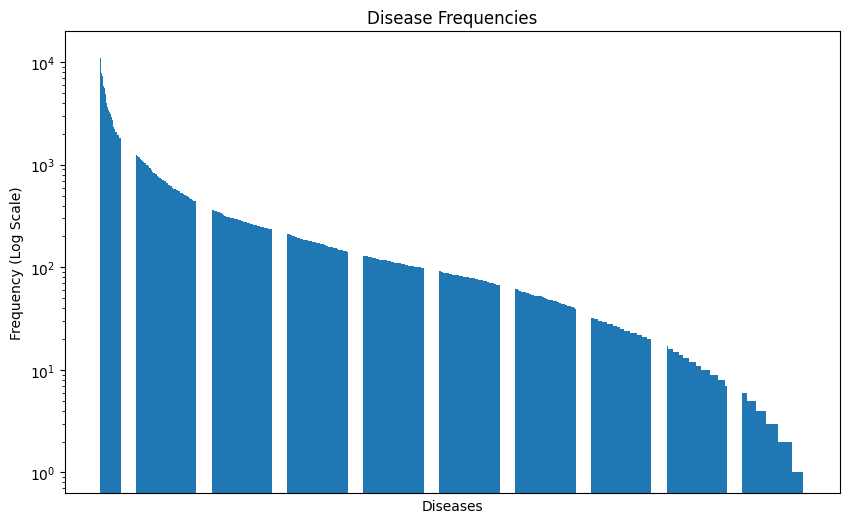

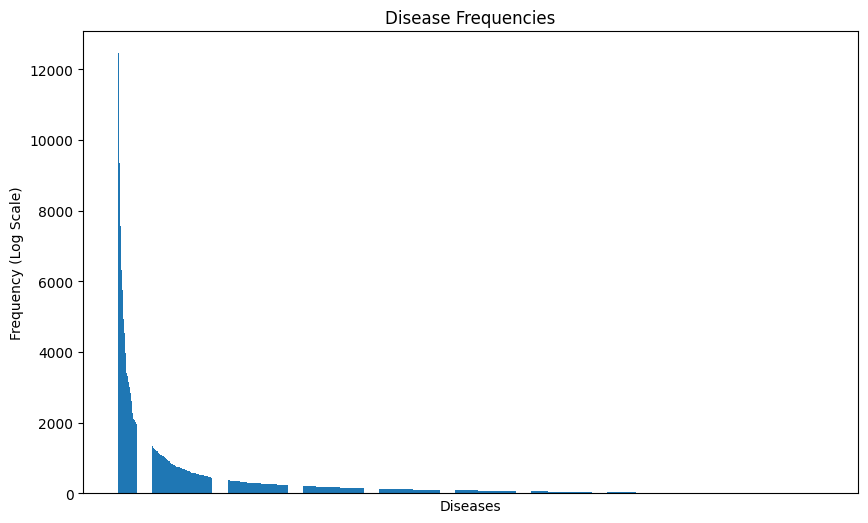

In [ ]:
import matplotlib.pyplot as plt
disease_freq = {}
for label_set in labels:
    for disease in label_set:
        disease_freq[disease] = disease_freq.get(disease, 0) + 1

sorted_diseases = sorted(disease_freq.items(), key=lambda item: item[1], reverse=True)

diseases, frequencies = zip(*sorted_diseases)

plt.figure(figsize=(10, 6))
plt.bar(range(len(diseases)), frequencies)
plt.yscale('log')
plt.xticks([])
plt.xlabel("Diseases")
plt.ylabel("Frequency (Log Scale)")
plt.title("Disease Frequencies")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(len(diseases)), frequencies)
plt.xticks([])
plt.xlabel("Diseases")
plt.ylabel("Frequency (Log Scale)")
plt.title("Disease Frequencies")
plt.show()

In [ ]:
print("Frequency of diseases: ", frequencies)
print("Min Frequency: ",  np.min(frequencies))
print("Max Frequency: ",  np.max(frequencies))

Frequency of diseases:  (12452, 10928, 9349, 7901, 7565, 7342, 6337, 5849, 5758, 5626, 4938, 4930, 4540, 3992, 3979, 3627, 3403, 3399, 3311, 3285, 3148, 3108, 3013, 2937, 2841, 2723, 2622, 2361, 2269, 2233, 2116, 2094, 2069, 2065, 2032, 1964, 1961, 1946, 1874, 1841, 1816, 1808, 1775, 1733, 1712, 1679, 1675, 1671, 1620, 1599, 1569, 1566, 1543, 1510, 1485, 1485, 1434, 1433, 1419, 1418, 1411, 1407, 1398, 1390, 1376, 1364, 1358, 1339, 1307, 1294, 1262, 1252, 1238, 1231, 1210, 1204, 1197, 1190, 1179, 1146, 1132, 1125, 1109, 1096, 1078, 1075, 1068, 1055, 1052, 1046, 1036, 1032, 1006, 991, 990, 970, 967, 941, 936, 932, 928, 921, 881, 869, 844, 838, 832, 830, 827, 819, 819, 811, 806, 770, 769, 762, 753, 749, 747, 740, 737, 736, 731, 718, 714, 706, 703, 699, 692, 690, 690, 686, 665, 659, 657, 653, 637, 636, 631, 625, 623, 622, 614, 606, 598, 588, 582, 582, 580, 579, 578, 577, 569, 568, 563, 563, 557, 552, 549, 540, 533, 533, 533, 529, 525, 525, 522, 514, 510, 510, 502, 499, 494, 493, 493, 492, 

In [ ]:
from collections import Counter

def count_unique_strings(input_list):
  string_counts = {}
  for item in input_list:
    if isinstance(item, str):
      string_counts[item] = string_counts.get(item, 0) + 1
  return string_counts

first_letters = [code[0] for code in mlb.classes_]
letter_counts = Counter(first_letters)
print("Counts of first letters:", letter_counts)
print("Total number of general class codes: ",len(letter_counts.keys()))


print()
print("________________ Level 2 ________________")
codes_before_dot = []
values_after_dot = []
for code in mlb.classes_:
    parts = code.split('.')
    numbers_before_dot = parts[0][1:]
    if numbers_before_dot:
        codes_before_dot.append(numbers_before_dot)
print("Level 2 Sub-classes: ", count_unique_strings(codes_before_dot))
print("Total Number of codes: ", len(set(codes_before_dot)))
if number_ranges_before_dot:
    print("Range of numbers before '.':", min(number_ranges_before_dot), "-", max(number_ranges_before_dot))
else:
    print("No numbers found before '.' in labels.")


print()
print("________________ Level 3 ________________")
code_after_dot = []
no_code_after_dot = []
for code in mlb.classes_:
    try:
        parts = code.split('.')
        numbers_after_dot = parts[1]
        if numbers_after_dot:
            code_after_dot.append(numbers_after_dot)
    except (IndexError, ValueError):
      no_code_after_dot.append(code)
print("Level 3 Sub-classes: ", count_unique_strings(code_after_dot))
print("Total Number of codes: ", len(set(code_after_dot)))
print("No code after dot: ", no_code_after_dot)

Counts of first letters: Counter({'M': 360, 'H': 228, 'K': 131, 'N': 106, 'S': 93, 'Z': 90, 'D': 68, 'R': 58, 'C': 47, 'L': 40, 'J': 36, 'G': 32, 'Q': 29, 'E': 25, 'T': 25, 'I': 11, 'F': 9, 'B': 5, 'O': 2, 'A': 1, 'V': 1, 'W': 1, 'X': 1, 'Y': 1})
Total number of general class codes:  24

________________ Level 2 ________________
Level 2 Sub-classes:  {'63': 14, '07': 3, '35': 33, '37': 1, '96': 13, '15': 5, '18': 23, '20': 19, '25': 67, '34': 7, '43': 31, '44': 13, '50': 31, '54': 17, '61': 6, '67': 22, '69': 18, '73': 9, '77': 14, '78': 3, '79': 25, '85': 30, '90': 27, '03': 7, '05': 13, '06': 5, '10': 13, '11': 23, '12': 10, '13': 13, '14': 3, '17': 18, '21': 28, '22': 22, '23': 32, '24': 32, '27': 7, '30': 10, '31': 24, '36': 5, '48': 13, '49': 3, '64': 16, '04': 15, '28': 2, '65': 39, '66': 15, '88': 3, '32': 14, '33': 28, '41': 4, '80': 12, '84': 7, '47': 22, '51': 17, '56': 10, '57': 19, '58': 4, '62': 26, '89': 15, '00': 5, '02': 28, '16': 8, '26': 8, '40': 23, '52': 15, '53': 1

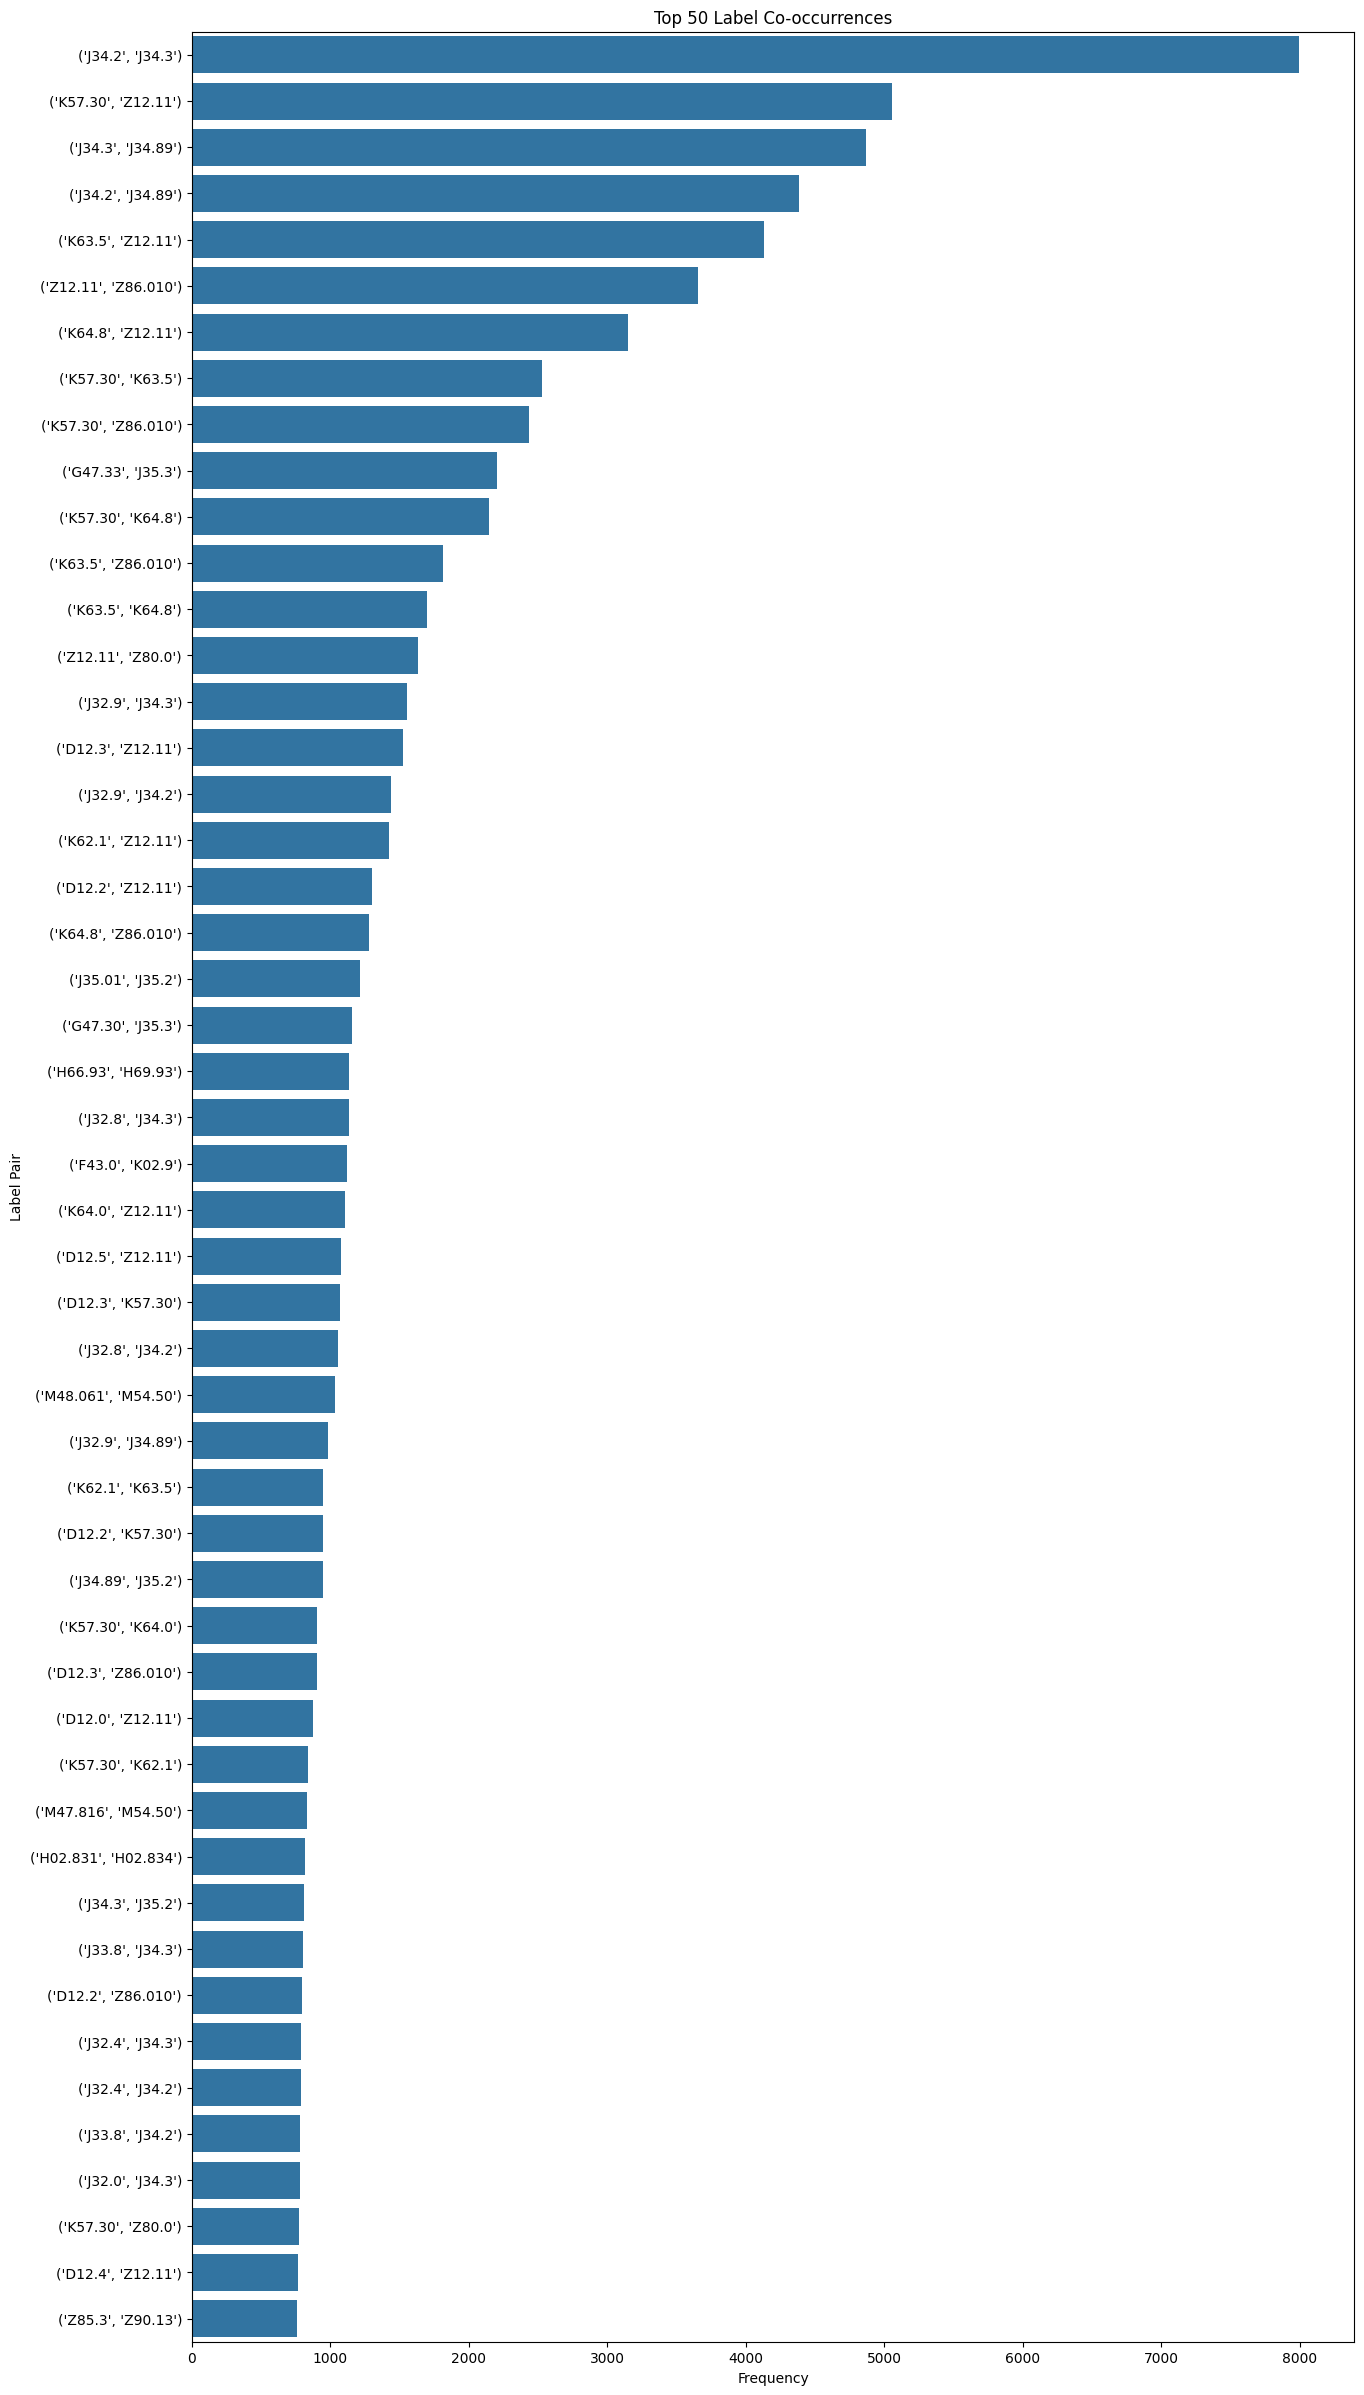

In [ ]:
import itertools
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

co_occurrence_counts = Counter()

for label_set in labels:

    pairs = itertools.combinations(sorted(label_set), 2)
    co_occurrence_counts.update(pairs)

top_pairs = co_occurrence_counts.most_common(50)

top_pairs_df = pd.DataFrame(top_pairs, columns=["Label Pair", "Frequency"])
top_pairs_df["Label Pair"] = top_pairs_df["Label Pair"].astype(str)

plt.figure(figsize=(15, 30))
sns.barplot(x="Frequency", y="Label Pair", data=top_pairs_df)
plt.title("Top 50 Label Co-occurrences")
plt.show()

It is observed that quite a few diseases occur frequentl together and this information will be used while training the hierarchical model.

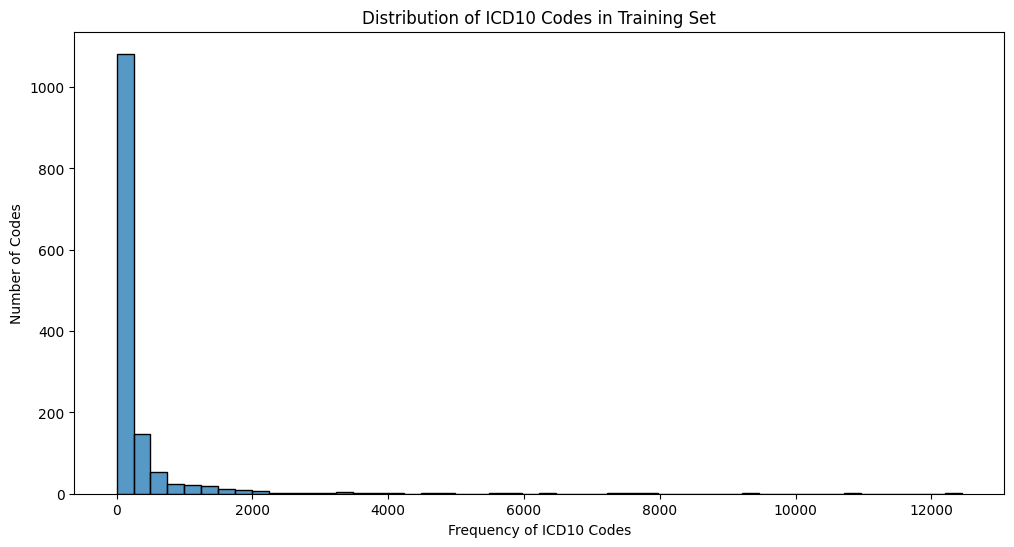

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

label_counts = multi_hot_labels.sum(axis=0)
plt.figure(figsize=(12, 6))
sns.histplot(label_counts, bins=50)
plt.title('Distribution of ICD10 Codes in Training Set')
plt.xlabel('Frequency of ICD10 Codes')
plt.ylabel('Number of Codes')
plt.show()

It can be observed that they dataset is very skewed.

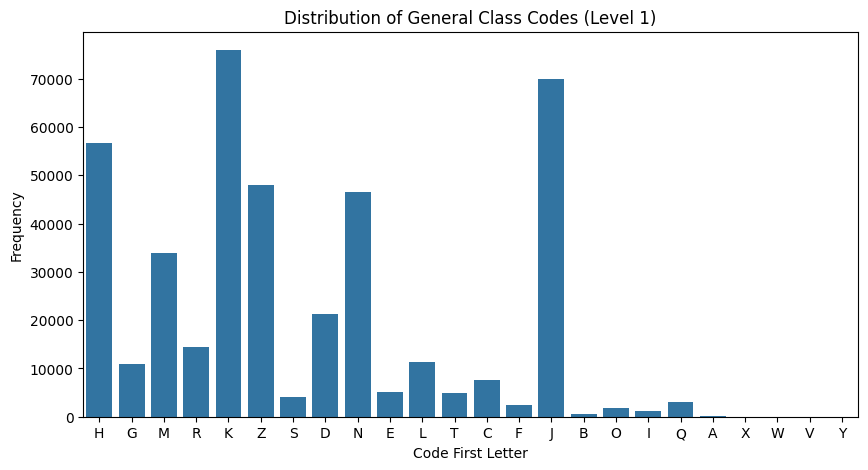

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer


df = pd.DataFrame({
    'embedding': list(embeddings),
    'labels': labels
})

all_labels = [label for sublist in df['labels'] for label in sublist]
label_counts = Counter(all_labels)
level1_codes = [label[0] for label in all_labels]
level1_counts = Counter(level1_codes)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(level1_counts.keys()), y=list(level1_counts.values()))
plt.title('Distribution of General Class Codes (Level 1)')
plt.xlabel('Code First Letter')
plt.ylabel('Frequency')
plt.show()


# Section 2: Linear SVC
Here we trained a simple One vs Rest linear SVC for each class and will be setting the simple benchmark for the Neural Network models. This model gave a Micro-F1 Score of 31.6% on the unseen test data.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

print("Training LinearSVC model using OneVsRestClassifier for multi-label classification...")
svm_model = OneVsRestClassifier(LinearSVC(max_iter=15000, dual=False))
svm_model.fit(embeddings, multi_hot_labels)


print("Predicting on test data and preparing submission file...")
test_data = np.load('test_data.npy')
test_data = pca.transform(test_data)
test_pred = svm_model.predict(test_data)

Training LinearSVC model using OneVsRestClassifier for multi-label classification...


In [ ]:
del embeddings
del svm_model
del test_data

test_icd10_codes = mlb.inverse_transform(test_pred)
submission_df = pd.DataFrame({
    'id': range(1, len(test_icd10_codes) + 1),
    'labels': [';'.join(sorted(codes)) for codes in test_icd10_codes]
})
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")


Submission file 'submission.csv' created successfully.


# Section 3: Hyperparameter Tuning
In this section we introduce a simple 3 layer Sequential Feed Forward Neural Network. This will be the based throughout the

In [ ]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/DAL_DataChallenge

/content/drive/MyDrive/DAL_DataChallenge


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models, losses
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import cast, float32, stack
from tensorflow.keras.backend import sum as K_sum, int_shape, epsilon, mean as K_mean

## 1.1 Trial 1: Observing validation set results for different hyperparameters
The below set up is a sufficiently unbiased first trial to understand how to tune the hyperparameters of a simple Sequential Feed-forward neural network.

In [ ]:
def micro_f2_score(y_true, y_pred, threshold=0.5):
    y_pred = cast(y_pred > threshold, float32)
    y_true = cast(y_true, float32)
    TP = K_sum(y_true * y_pred)
    FP = K_sum((1 - y_true) * y_pred)
    FN = K_sum(y_true * (1 - y_pred))
    precision = TP / (TP + FP + epsilon())
    recall = TP / (TP + FN + epsilon())
    beta = 2
    f2 = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + epsilon())
    return f2

embeddings_1 = np.load('embeddings_1.npy')
embeddings_2 = np.load('embeddings_2.npy')
embeddings = np.vstack([embeddings_1, embeddings_2])

with open('icd_codes_1.txt', 'r') as f:
    labels_1 = [line.strip().split(';') for line in f.readlines()]
with open('icd_codes_2.txt', 'r') as f:
    labels_2 = [line.strip().split(';') for line in f.readlines()]
labels = labels_1 + labels_2

del labels_1, labels_2, embeddings_1, embeddings_2

mlb = MultiLabelBinarizer()
labels_mlb = mlb.fit_transform(labels)
del labels

X_train, X_val, y_train, y_val = train_test_split(embeddings, labels_mlb, test_size=0.1, random_state=42)

input_dim = 1024
output_dim = labels_mlb.shape[1]
del embeddings, labels_mlb

print("Loading test data...")
test_data = np.load('test_data.npy')

for af, activation_func in enumerate([
            ('relu', 'tanh', 'sigmoid'),
            ('relu', 'relu', 'sigmoid'),
            ('relu', layers.LeakyReLU(alpha=0.01), 'sigmoid'),
            (layers.LeakyReLU(alpha=0.01), layers.LeakyReLU(alpha=0.01), 'sigmoid')
        ]):
  for dr, dropout_rate in enumerate([(0.2, 0.1), (0.2, 0.2), (0.3, 0.2), (0.1, 0.05)]):
    for op_lr, optimizer in enumerate([Adam(learning_rate=0.001), Adam(learning_rate=0.0001),
                                       Adam(learning_rate=0.00001), RMSprop(learning_rate=0.0001), RMSprop(learning_rate=0.001),
                                       Adagrad(learning_rate=0.001), Nadam(learning_rate=0.0001)]):
            model = models.Sequential([
                layers.Input(shape=(input_dim,)),
                layers.Dense(1024, activation=activation_func[0]),
                layers.Dropout(dropout_rate[0]),
                layers.BatchNormalization(),
                layers.Dense(512, activation=activation_func[1]),
                layers.Dropout(dropout_rate[1]),
                layers.BatchNormalization(),
                layers.Dense(output_dim, activation=activation_func[2]),
            ])
            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[micro_f2_score])

            filename_40 = f"submission_40epochs_dr{dr}_lr{op_lr}_af{af}.csv"
            filename_80 = f"submission_80epochs_dr{dr}_lr{op_lr}_af{af}.csv"
            print(f"Training model with dropout {dropout_rate}, optimizer {optimizer}, activations {activation_func}")
            history_40 = model.fit(
                X_train, y_train,
                epochs=40,
                batch_size=128,
                validation_data=(X_val, y_val)
            )
            print("Predicting on test data after 40 epochs...")
            test_pred_prob_40 = model.predict(test_data)
            test_pred_40 = (test_pred_prob_40 > 0.5).astype(int)
            test_icd10_codes_40 = mlb.inverse_transform(test_pred_40)
            submission_df_40 = pd.DataFrame({
                'id': range(1, len(test_icd10_codes_40) + 1),
                'labels': [';'.join(sorted(codes)) for codes in test_icd10_codes_40]
            })
            submission_df_40.to_csv(filename_40, index=False)
            del test_pred_prob_40, test_pred_40, test_icd10_codes_40, submission_df_40
            history_80 = model.fit(
                X_train, y_train,
                initial_epoch=40,
                epochs=80,
                batch_size=128,
                validation_data=(X_val, y_val)
            )
            print("Predicting on test data after 80 epochs...")
            test_pred_prob_80 = model.predict(test_data)
            test_pred_80 = (test_pred_prob_80 > 0.5).astype(int)
            test_icd10_codes_80 = mlb.inverse_transform(test_pred_80)
            submission_df_80 = pd.DataFrame({
                'id': range(1, len(test_icd10_codes_80) + 1),
                'labels': [';'.join(sorted(codes)) for codes in test_icd10_codes_80]
            })
            submission_df_80.to_csv(filename_80, index=False)

            Clear variables to manage memory
            del history_40, history_80, test_pred_prob_80, test_pred_80, test_icd10_codes_80, submission_df_80, model


Loading test data...
Training model with dropout (0.2, 0.1), optimizer <keras.src.optimizers.adam.Adam object at 0x7e84b51b00d0>, activations ('relu', 'tanh', 'sigmoid')
Epoch 1/40
1400/1400 [==============================] - 31s 21ms/step - loss: 0.0333 - micro_f2_score: 0.3290 - val_loss: 0.0028 - val_micro_f2_score: 0.6002
Epoch 2/40
1400/1400 [==============================] - 29s 21ms/step - loss: 0.0026 - micro_f2_score: 0.6547 - val_loss: 0.0021 - val_micro_f2_score: 0.7417
Epoch 3/40
1400/1400 [==============================] - 29s 21ms/step - loss: 0.0020 - micro_f2_score: 0.7232 - val_loss: 0.0018 - val_micro_f2_score: 0.7636
Epoch 4/40
1400/1400 [==============================] - 29s 21ms/step - loss: 0.0018 - micro_f2_score: 0.7521 - val_loss: 0.0018 - val_micro_f2_score: 0.7877
Epoch 5/40
1400/1400 [==============================] - 29s 20ms/step - loss: 0.0017 - micro_f2_score: 0.7693 - val_loss: 0.0017 - val_micro_f2_score: 0.7879
Epoch 6/40
1400/1400 [==================

Observations from the previous outputs are as follows:

I have 1400 multi label classification, 1024  feature vector embedding and a dataset large enough to have large batch sizes of 128 in training. On observation of the decay of validation loss and val_micro_score we will tryAll the optimizers in the order of Adam, Nadam and Adagrad to observe the difference in the validation loss and adding apropriate learning rates for each based on the following observations.
1. Adam with learning rate = 0.001 converges in 18 epochs
2. Adam with learning rate = 0.0001 converges in 47 epochs and has a better validation loss.
3. The tanh activation function is computationally intensive as compared to relu and LeakyRelu. So we first be testing the other hyperparameters with relu and it's variants.

## 1.2 Trial 2: Additional Early stopping
It was observed that for most cases, 40/80 epochs is overfitting the model. Hence, early stopping has been added and we observe the results on the dataset.

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models, losses
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import cast, float32, stack
from tensorflow.keras.backend import sum as K_sum, int_shape, epsilon, mean as K_mean
from tensorflow.keras.callbacks import Callback


def micro_f2_score(y_true, y_pred, threshold=0.5):
    y_pred = cast(y_pred > threshold, float32)
    y_true = cast(y_true, float32)
    TP = K_sum(y_true * y_pred)
    FP = K_sum((1 - y_true) * y_pred)
    FN = K_sum(y_true * (1 - y_pred))
    precision = TP / (TP + FP + epsilon())
    recall = TP / (TP + FN + epsilon())
    beta = 2
    f2 = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + epsilon())
    return f2

embeddings_1 = np.load('embeddings_1.npy')
embeddings_2 = np.load('embeddings_2.npy')
embeddings = np.vstack([embeddings_1, embeddings_2])

with open('icd_codes_1.txt', 'r') as f:
    labels_1 = [line.strip().split(';') for line in f.readlines()]
with open('icd_codes_2.txt', 'r') as f:
    labels_2 = [line.strip().split(';') for line in f.readlines()]
labels = labels_1 + labels_2

del labels_1, labels_2, embeddings_1, embeddings_2


mlb = MultiLabelBinarizer()
labels_mlb = mlb.fit_transform(labels)
del labels

X_train, X_val, y_train, y_val = train_test_split(embeddings, labels_mlb, test_size=0.1, random_state=42)

input_dim = 1024
output_dim = labels_mlb.shape[1]
del embeddings, labels_mlb


print("Loading test data...")
test_data = np.load('test_data.npy')

optimizers = {
    "Adam_high_lr": Adam(learning_rate=0.001),
    "Nadam": Nadam(learning_rate=0.0001),
    "Adagrad": Adagrad(learning_rate=0.01),


    "Adam_low_lr": Adam(learning_rate=0.0001),
    "Adam_very_low_lr": Adam(learning_rate=0.00005),

    "Nadam_low_lr": Nadam(learning_rate=0.00005),

    "RMSprop": RMSprop(learning_rate=0.0001),
    "RMSprop_low_lr": RMSprop(learning_rate=0.00005),

    "Adagrad_low_lr": Adagrad(learning_rate=0.001),
}



class EarlyStoppingOnIncrease(Callback):
    def __init__(self, model, dr, op_lr, af):
        super().__init__()
        self.model = model
        self.best_val_loss = float('inf')
        self.dr = dr
        self.op_lr = op_lr
        self.af = af

    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs.get('val_loss')


        if val_loss and val_loss > self.best_val_loss:
            print(f"Validation loss increased at epoch {epoch+1}. Stopping training.")
            self.model.stop_training = True
            self.make_prediction(epoch)
        else:
            self.best_val_loss = val_loss

    def make_prediction(self, epoch):
        print(f"Making prediction at epoch {epoch+1} due to validation loss increase.")
        test_pred_prob = self.model.predict(test_data)
        test_pred = (test_pred_prob > 0.5).astype(int)
        test_icd10_codes = mlb.inverse_transform(test_pred)


        filename = f"epoch{epoch+1}_{self.af}_{self.dr}_{self.op_lr}.csv"
        submission_df = pd.DataFrame({
            'id': range(1, len(test_icd10_codes) + 1),
            'labels': [';'.join(sorted(codes)) for codes in test_icd10_codes]
        })
        submission_df.to_csv(filename, index=False)
        print(f"Saved predictions to {filename}")
        del test_pred_prob, test_pred, test_icd10_codes, submission_df


for af, activation_func in {
            "relu_Lrelu": ('relu', layers.LeakyReLU(alpha=0.01), 'sigmoid'),
            "relu_relu": ('relu', 'relu', 'sigmoid'),
            "relu_tanh": ('relu', 'tanh', 'sigmoid'),
            "Lrelu_Lrelu": (layers.LeakyReLU(alpha=0.01), layers.LeakyReLU(alpha=0.01), 'sigmoid'),
        }.items():
  for dr, dropout_rate in {"20_10": (0.2, 0.1), "20_20": (0.2, 0.2), "10_05":(0.1, 0.05), "25_15":(0.25, 0.15)}.items():
          for op_lr, optimizer in optimizers.items():

            model = models.Sequential([
                layers.Input(shape=(input_dim,)),
                layers.Dense(1024, activation=activation_func[0]),
                layers.Dropout(dropout_rate[0]),
                layers.BatchNormalization(),
                layers.Dense(512, activation=activation_func[1]),
                layers.Dropout(dropout_rate[1]),
                layers.BatchNormalization(),
                layers.Dense(output_dim, activation=activation_func[2]),
            ])


            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[micro_f2_score])


            print(f"Training model with dropout {dropout_rate}, optimizer {optimizer}, activations {activation_func}")


            early_stopping_callback = EarlyStoppingOnIncrease(model, dr, op_lr, af)
            model.fit(
                X_train, y_train,
                epochs=100,
                batch_size=128,
                validation_data=(X_val, y_val),
                callbacks=[early_stopping_callback]
            )


## Trial 1.3
On observation, Adagrad converges unreliably as compared to the other optimizers. It is also observed that the model has to tolerate some fluctuation in validation loss which was has now been incorporated in the early stopping tolerance

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models, losses
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import cast, float32, stack
from tensorflow.keras.backend import sum as K_sum, int_shape, epsilon, mean as K_mean
from tensorflow.keras.callbacks import Callback

def micro_f2_score(y_true, y_pred, threshold=0.5):
    y_pred = cast(y_pred > threshold, float32)
    y_true = cast(y_true, float32)
    TP = K_sum(y_true * y_pred)
    FP = K_sum((1 - y_true) * y_pred)
    FN = K_sum(y_true * (1 - y_pred))
    precision = TP / (TP + FP + epsilon())
    recall = TP / (TP + FN + epsilon())
    beta = 2
    f2 = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + epsilon())
    return f2

embeddings_1 = np.load('embeddings_1.npy')
embeddings_2 = np.load('embeddings_2.npy')
embeddings = np.vstack([embeddings_1, embeddings_2])

with open('icd_codes_1.txt', 'r') as f:
    labels_1 = [line.strip().split(';') for line in f.readlines()]
with open('icd_codes_2.txt', 'r') as f:
    labels_2 = [line.strip().split(';') for line in f.readlines()]
labels = labels_1 + labels_2

del labels_1, labels_2, embeddings_1, embeddings_2


mlb = MultiLabelBinarizer()
labels_mlb = mlb.fit_transform(labels)
del labels

X_train, X_val, y_train, y_val = train_test_split(embeddings, labels_mlb, test_size=0.1, random_state=42)

input_dim = 1024
output_dim = labels_mlb.shape[1]
del embeddings, labels_mlb

print("Loading test data...")
test_data = np.load('test_data.npy')

# Please note the below
optimizers = {
    "Adam_high_lr": Adam(learning_rate=0.001),
    "Nadam": Nadam(learning_rate=0.0001),  # Prioritizes smooth convergence with Nesterov momentum: has been added as it showed promising results previously
    #"Adagrad": Adagrad(learning_rate=0.01),  # Removed due to the higher initial rate that quickly decays to lead to extremely slow convergence


    "Adam_low_lr": Adam(learning_rate=0.0001),
    "Adam_very_low_lr": Adam(learning_rate=0.00005),

    "Nadam_low_lr": Nadam(learning_rate=0.00005),  # Lower rate to prevent overshooting in final convergence

    "RMSprop": RMSprop(learning_rate=0.0001),  # RMS is good with noisy gradients: thus trying it to observe any patterns
    "RMSprop_low_lr": RMSprop(learning_rate=0.00005),
}


class EarlyStoppingOnIncrease(Callback):
    def __init__(self, model, dr, op_lr, af):
        super().__init__()
        self.model = model
        self.best_val_loss = float('inf')
        self.dr = dr
        self.op_lr = op_lr
        self.af = af

    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs.get('val_loss')

        if val_loss and val_loss > self.best_val_loss:
            if val_loss - self.best_val_loss  <= 0.00006:
              return
            print(f"Validation loss increased at epoch {epoch+1}: {self.best_val_loss:.6f} --> {val_loss:.6f}. Stopping training.")
            self.model.stop_training = True
            self.make_prediction(epoch)
        else:
            self.best_val_loss = val_loss

    def make_prediction(self, epoch):
        print(f"Making prediction at epoch {epoch+1} due to validation loss increase.")
        test_pred_prob = self.model.predict(test_data)
        test_pred = (test_pred_prob > 0.5).astype(int)
        test_icd10_codes = mlb.inverse_transform(test_pred)

        filename = f"epoch{epoch+1}_{self.af}_{self.dr}_{self.op_lr}.csv"
        submission_df = pd.DataFrame({
            'id': range(1, len(test_icd10_codes) + 1),
            'labels': [';'.join(sorted(codes)) for codes in test_icd10_codes]
        })
        submission_df.to_csv(filename, index=False)
        print(f"Saved predictions to {filename}")
        del test_pred_prob, test_pred, test_icd10_codes, submission_df

for af, activation_func in {
            "relu_Lrelu": ('relu', layers.LeakyReLU(alpha=0.01), 'sigmoid'),
            "relu_relu": ('relu', 'relu', 'sigmoid'),
            "relu_tanh": ('relu', 'tanh', 'sigmoid'),
            "Lrelu_Lrelu": (layers.LeakyReLU(alpha=0.01), layers.LeakyReLU(alpha=0.01), 'sigmoid'),
        }.items():
  for dr, dropout_rate in {"20_10": (0.2, 0.1), "20_20": (0.2, 0.2), "10_05":(0.1, 0.05), "25_15":(0.25, 0.15)}.items():
          for op_lr, optimizer in optimizers.items():
            if (af =="relu_Lrelu" and dropout_rate == "20_10" and (op_lr == "Adam_low_lr" or op_lr == "Nadam")):
              print("Already completed")
              continue
            model = models.Sequential([
                layers.Input(shape=(input_dim,)),
                layers.Dense(1024, activation=activation_func[0]),
                layers.Dropout(dropout_rate[0]),
                layers.BatchNormalization(),
                layers.Dense(512, activation=activation_func[1]),
                layers.Dropout(dropout_rate[1]),
                layers.BatchNormalization(),
                layers.Dense(output_dim, activation=activation_func[2]),
            ])

            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[micro_f2_score])
            print(f"Training model with dropout {dropout_rate}, optimizer {optimizer}, activations {activation_func}")

            # Training with callback
            early_stopping_callback = EarlyStoppingOnIncrease(model, dr, op_lr, af)
            model.fit(
                X_train, y_train,
                epochs=100,
                batch_size=128,
                validation_data=(X_val, y_val),
                callbacks=[early_stopping_callback]
            )


Loading test data...
Training model with dropout (0.2, 0.1), optimizer <keras.src.optimizers.adam.Adam object at 0x7c28d1744f70>, activations ('relu', <keras.src.layers.activation.leaky_relu.LeakyReLU object at 0x7c28d0d63250>, 'sigmoid')
Epoch 1/100
1400/1400 [==============================] - 31s 21ms/step - loss: 0.0333 - micro_f2_score: 0.3471 - val_loss: 0.0027 - val_micro_f2_score: 0.6171
Epoch 2/100
1400/1400 [==============================] - 29s 21ms/step - loss: 0.0025 - micro_f2_score: 0.6622 - val_loss: 0.0019 - val_micro_f2_score: 0.7247
Epoch 3/100
1400/1400 [==============================] - 28s 20ms/step - loss: 0.0020 - micro_f2_score: 0.7279 - val_loss: 0.0017 - val_micro_f2_score: 0.7658
Epoch 4/100
1400/1400 [==============================] - 28s 20ms/step - loss: 0.0017 - micro_f2_score: 0.7562 - val_loss: 0.0016 - val_micro_f2_score: 0.7766
Epoch 5/100
1400/1400 [==============================] - 28s 20ms/step - loss: 0.0016 - micro_f2_score: 0.7741 - val_loss: 0.

# Section 4: Hierarchical Model
From the data exploration and the meta data avaiable on the website, it is clear that there is a hierarchical structure to the ICD10 Codes.

ICD10 Code: <*Alphabet* (24 options)>< _[0-99]_ >.< *subcode* (may or maynot be present)>

Based on this structure, a 3 level hierarchical model has been created.

#### Level 1: Class Prediction
**Input**: 1024 dimension Gatortron embeddings

**Output**: 24 dimension encoded labels representing 24 classes


#### Level 2:
**Input**: The following has been concatenated:
  1. 1024 dimension Gatortron embeddings
  2. Encoded class labels that were output from the Level 1 model
  3. The data frame was exploded such that each row had one unique class based on which it was predicting. eg:

Initial Level 2 Input

| gatortron_embedding                               | labels                           | row_id | level_label    |
|---------------------------------------------------|----------------------------------|--------|----------------|
| [-0.13862878, -0.2293093, -0.6919088, 0.174990]   | [H65.23]                         | 0      | [H]           |
| [1.338272, -0.1234684, 0.52291596, -0.7611705]    | [G89.29, M25.562]                | 1      | [G, M]        |
| [-0.3138016, -0.71716565, 0.3034158, 0.6537929]   | [R13.10, K20.90, K31.89, K25.9, K29.80] | 2 | [R, K, K, K, K] |


Processed Level 2 Input:


| Index | Gatortron Embeddings(X1)                                           | Original Label (Reference)                            | Group (RowID) |  Class (X2)   | Primary Class (X3)  | SubClass (y_train/label)               |
|-------|--------------------------------------------------|----------------------------------|-------|--------------|--------------|--------------------------|
| 0     | [-0.13862878, -0.2293093, -0.6919088, 0.174990] | [H65.23]                         | 0     | [H]          | H            | [H65]                    |
| 0     | [-0.13862878, -0.2293093, -0.6919088, 0.174990] | [H65.23]                         | 0     |              |              | [H65]                    |
| 1     | [1.338272, -0.1234684, 0.52291596, -0.7611705]  | [G89.29, M25.562]                | 1     | [G, M]       | G            | [G89]                    |
| 1     | [1.338272, -0.1234684, 0.52291596, -0.7611705]  | [G89.29, M25.562]                | 1     | [G, M]       | M            | [M25]                    |
| 1     | [1.338272, -0.1234684, 0.52291596, -0.7611705]  | [G89.29, M25.562]                | 1     |              |              | [G89, M25]               |
| 2     | [-0.3138016, -0.71716565, 0.3034158, 0.6537929] | [R13.10, K20.90, K31.89, K25.9, K29.80] | 2 | [R, K, K, K, K] | R     | [R13]                    |
| 2     | [-0.3138016, -0.71716565, 0.3034158, 0.6537929] | [R13.10, K20.90, K31.89, K25.9, K29.80] | 2 | [R, K, K, K, K] | K     | [K20, K31, K25, K29]    |
| 2     | [-0.3138016, -0.71716565, 0.3034158, 0.6537929] | [R13.10, K20.90, K31.89, K25.9, K29.80] | 2 |              |              | [R13, K20, K31, K25, K29] |


The advantage of using the classes in a unique manner should allow the model to identify the common subclasses for a given class for a specific cluster as well as the group of high level classes it occurs with. Apart from this this set of features has been chosen so that we can also identify the subclass if it appears independent of its parent class cluster.

**Output**: 391 dimension encoded labels representing 391 classes

#### Level 3:
**Input**: The following have been concatenated:
1. Gatortron Embeddings
2. Level 1 output
3. Level 2 output

Then every row of the train set has been replicated with the following changes.
1. Copy row after setting Level 1 result to [] : row_copy1
2. Copy row after setting Level 2 result to [] : row_copy2
3. Copy row after setting Level 1 and Level 2 result to [] : row_copy3

With this dataset the hope is that the model will be able to use the information from the previous models without being too dependent on them in case the previous models are not able to classify the class and subclasses correctly.

**Output**: 1400 encoded final ICD10 codes

#### Flowchart

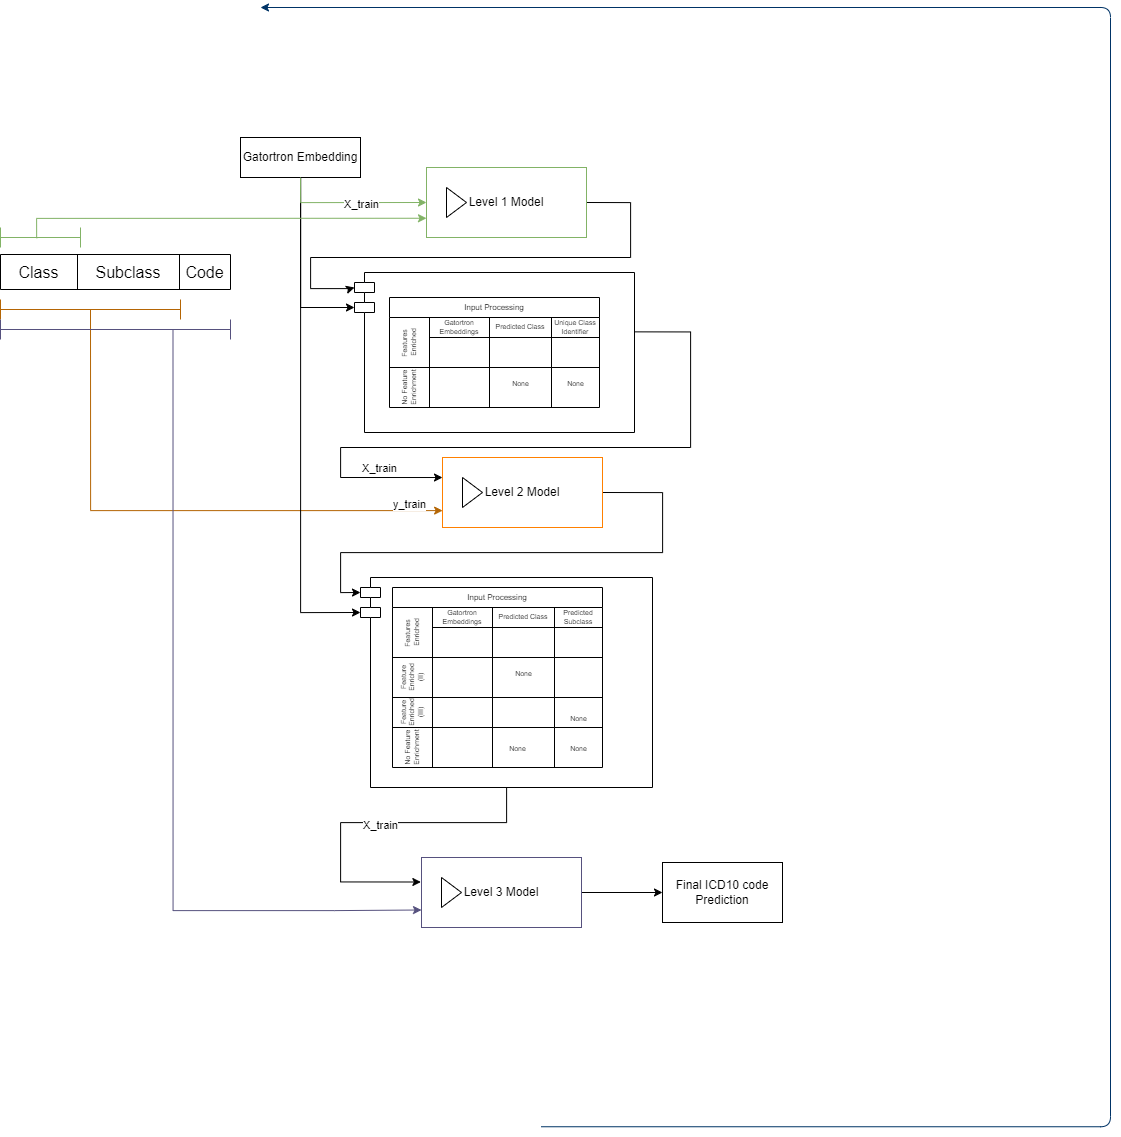

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import cast, float32, stack
from tensorflow.keras.backend import sum as K_sum, int_shape, epsilon, mean as K_mean

# Define micro F2 score function

def micro_f2_score(y_true, y_pred, threshold=0.5):
    y_pred = cast(y_pred > threshold, float32)
    y_true = cast(y_true, float32)
    TP = K_sum(y_true * y_pred)
    FP = K_sum((1 - y_true) * y_pred)
    FN = K_sum(y_true * (1 - y_pred))
    precision = TP / (TP + FP + epsilon())
    recall = TP / (TP + FN + epsilon())
    beta = 2
    f2 = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + epsilon())
    return f2


embeddings_1 = np.load('/kaggle/input/dal-data-challenge/embeddings_1.npy')
embeddings_2 = np.load('/kaggle/input/dal-data-challenge/embeddings_2.npy')
embeddings = np.vstack([embeddings_1, embeddings_2])

with open('/kaggle/input/dal-data-challenge/icd_codes_1.txt', 'r') as f:
    labels_1 = [line.strip().split(';') for line in f.readlines()]
with open('/kaggle/input/dal-data-challenge/icd_codes_2.txt', 'r') as f:
    labels_2 = [line.strip().split(';') for line in f.readlines()]

labels = labels_1 + labels_2



del labels_1, labels_2, embeddings_1, embeddings_2
print("Loading test data...")

test_data = np.load('/kaggle/input/dal-data-challenge/test_data.npy')
print("Labels: ", len(labels))
print("Embeddings: ", embeddings.shape)
df = pd.DataFrame([{"gatortron_embedding":embedding, "labels":label} for label, embedding in zip(labels, embeddings)])
del labels, embeddings

df["row_id"] = df.index.copy()

Loading test data...
Labels:  198982
Embeddings:  (198982, 1024)


## Model

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.models as models

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

def train_and_evaluate_model(X_train, y_train, X_test, y_test, mlb_class):

    print("Input Feature sizes: ", X_train.shape, "Label dimensions: ", y_train.shape, X_test.shape, y_test.shape)

    input_dim = X_train.shape[1]
    output_dim = y_test.shape[1]
    model = models.Sequential([
        Input(shape=(input_dim,)),
        Dense(1024, activation='relu'),
        Dropout(0.2),
        BatchNormalization(),
        Dense(512, activation='relu'),
        Dropout(0.1),
        Dense(output_dim, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.00001),
                  loss='binary_crossentropy',
                  metrics=[micro_f2_score])
    early_stopping = EarlyStopping(
        monitor='val_loss',
        mode='min',
        patience=5,  # Waiting 5 epochs to see if loss improves before stopping [Based on the observations in the previous section]
        restore_best_weights=False,
        verbose=1

    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=128, # the batch size for Level 3 prediction used was 4096 as the enriched dataset was about 3 times larger than the original dataset.
        callbacks=[early_stopping],
        verbose=1
    )

    results = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Loss: {results[0]}, Test Micro F1 Score: {results[1]}")

    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    report = classification_report(y_test, y_pred, target_names=[f'Label_{i}' for i in mlb_class], zero_division=1)
    print("\nClassification Report:\n", report)



    return model, history, report

## Level 1 Label

In [ ]:
df_copy= df.copy()
df_copy["level_label"] = df_copy.labels.apply(lambda x: [code[0] for code in x])
df_copy.head()

,gatortron_embedding,labels,row_id,level_label
0,"[-0.13862878, -0.2293093, -0.6919088, 0.174990...",[H65.23],0,[H]
1,"[1.338272, -0.1234684, 0.52291596, -0.7611705,...","[G89.29, M25.562]",1,"[G, M]"
2,"[-0.3138016, -0.71716565, 0.3034158, 0.6537929...","[R13.10, K20.90, K31.89, K25.9, K29.80]",2,"[R, K, K, K, K]"
3,"[-0.61768794, -0.83004194, -0.12642275, -0.410...","[K20.90, R10.11, Z86.010, K57.30, Z90.49]",3,"[K, R, Z, K, Z]"
4,"[0.7401532, 0.44934863, 0.07262057, -0.3706127...","[R93.3, K29.50, R10.84, K31.89, R19.7]",4,"[R, K, R, K, R]"


In [ ]:
class_prediction_mlb = MultiLabelBinarizer()
y = class_prediction_mlb.fit_transform(df_copy['level_label'])
print("Classes:", class_prediction_mlb.classes_)
X = df_copy["gatortron_embedding"]
X = np.array(X.to_list())
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
del X, y, df_copy
class_prediction_model, history, report = train_and_evaluate_model(X_train, y_train, X_test, y_test, class_prediction_mlb.classes_)
del history, report

Classes: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'Q' 'R' 'S'
 'T' 'V' 'W' 'X' 'Y' 'Z']
(198982, 1024) (198982, 24)
Input Feature sizes:  (179083, 1024) Label dimensions:  (179083, 24) (19899, 1024) (19899, 24)
Epoch 1/50


I0000 00:00:1731555466.189369     106 service.cc:145] XLA service 0x7df108005100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731555466.189423     106 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731555466.189427     106 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  62/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9305 - micro_f2_score: 0.2383

I0000 00:00:1731555470.511483     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.5506 - micro_f2_score: 0.4321 - val_loss: 0.0891 - val_micro_f2_score: 0.7732
Epoch 2/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0831 - micro_f2_score: 0.7637 - val_loss: 0.0465 - val_micro_f2_score: 0.8458
Epoch 3/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0488 - micro_f2_score: 0.8334 - val_loss: 0.0353 - val_micro_f2_score: 0.8815
Epoch 4/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0383 - micro_f2_score: 0.8656 - val_loss: 0.0304 - val_micro_f2_score: 0.8975
Epoch 5/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0334 - micro_f2_score: 0.8810 - val_loss: 0.0278 - val_micro_f2_score: 0.9059
Epoch 6/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0305 - micro_f2_score: 0.8912 - val_loss: 0.0262 - val_micro_f2_score: 0.9117
Epoch 7/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0287 - micro_f2_score: 0.8984 - val_loss: 0.0252 - val_micro_f2_score: 0.9152
Epoch 8/50
1400/

In [ ]:
import os
import joblib
import tensorflow as tf

os.makedirs('saved_models_hierarchical', exist_ok=True)
class_prediction_model.save(os.path.join('saved_models_hierarchical', 'class_prediction_model.keras'))
joblib.dump(class_prediction_mlb, os.path.join('saved_models_hierarchical', 'class_label_vectorizer.pkl'))

## Level 2 Sub-Class

In [ ]:
#LEVEL 2 df_copy
def filter_level_label(row):
    classID = row['unique_ID']
    if classID == "":
        return row['level_label']
    level_label = row['level_label']
    filtered_level_label = [sub for sub in level_label if sub[0] == classID]
    return filtered_level_label

df_copy = df.copy()
df_copy["additional_feature1"] = df_copy.labels.apply(lambda x: [code[0] for code in x])
df_copy["unique_ID"] = df_copy.additional_feature1.apply(lambda x: set (x + ['empty']))
df_copy = df_copy.explode("unique_ID")
df_copy.loc[df_copy.unique_ID == "empty", "additional_feature1"] = df_copy.loc[df_copy.unique_ID == "empty", "additional_feature1"].apply(lambda x: "")
df_copy.unique_ID = df_copy.unique_ID.apply(lambda x: x if x!="empty" else "")
# df_copy.unique_ID = df_copy.unique_ID
df_copy["level_label"] = df_copy.labels.apply(lambda x: [code[0:3] for code in x]) # str class
print("Dataframe: ", df_copy.shape)
df_copy.level_label = df_copy.apply(filter_level_label, axis=1)
df_copy.head(10)

Dataframe:  (480786, 6)


,gatortron_embedding,labels,row_id,additional_feature1,unique_ID,level_label
0,"[-0.13862878, -0.2293093, -0.6919088, 0.174990...",[H65.23],0,[H],H,[H65]
0,"[-0.13862878, -0.2293093, -0.6919088, 0.174990...",[H65.23],0,,,[H65]
1,"[1.338272, -0.1234684, 0.52291596, -0.7611705,...","[G89.29, M25.562]",1,"[G, M]",G,[G89]
1,"[1.338272, -0.1234684, 0.52291596, -0.7611705,...","[G89.29, M25.562]",1,"[G, M]",M,[M25]
1,"[1.338272, -0.1234684, 0.52291596, -0.7611705,...","[G89.29, M25.562]",1,,,"[G89, M25]"
2,"[-0.3138016, -0.71716565, 0.3034158, 0.6537929...","[R13.10, K20.90, K31.89, K25.9, K29.80]",2,"[R, K, K, K, K]",R,[R13]
2,"[-0.3138016, -0.71716565, 0.3034158, 0.6537929...","[R13.10, K20.90, K31.89, K25.9, K29.80]",2,"[R, K, K, K, K]",K,"[K20, K31, K25, K29]"
2,"[-0.3138016, -0.71716565, 0.3034158, 0.6537929...","[R13.10, K20.90, K31.89, K25.9, K29.80]",2,,,"[R13, K20, K31, K25, K29]"
3,"[-0.61768794, -0.83004194, -0.12642275, -0.410...","[K20.90, R10.11, Z86.010, K57.30, Z90.49]",3,"[K, R, Z, K, Z]",R,[R10]
3,"[-0.61768794, -0.83004194, -0.12642275, -0.410...","[K20.90, R10.11, Z86.010, K57.30, Z90.49]",3,"[K, R, Z, K, Z]",Z,"[Z86, Z90]"


In [ ]:
subclass_prediction_mlb = MultiLabelBinarizer()
y = subclass_prediction_mlb.fit_transform(df_copy['level_label'])
print("Classes:", subclass_prediction_mlb.classes_)

X = df_copy["gatortron_embedding"]
X = np.array(X.to_list())
additional_feature_l1 = class_prediction_mlb.transform(df_copy['additional_feature1'])
identification_l1 = class_prediction_mlb.transform(df_copy['unique_ID'])
X = np.concatenate([X, additional_feature_l1, identification_l1], axis=1)

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
del X, y, df_copy, additional_feature_l1, identification_l1
subclass_prediction_model, history, report = train_and_evaluate_model(X_train, y_train, X_test, y_test, subclass_prediction_mlb.classes_)
del history, report

Classes: ['A63' 'B07' 'B35' 'B37' 'B96' 'C15' 'C18' 'C20' 'C25' 'C34' 'C43' 'C44'
 'C50' 'C54' 'C61' 'C67' 'C69' 'C73' 'C77' 'C78' 'C79' 'C85' 'C90' 'D03'
 'D05' 'D06' 'D10' 'D11' 'D12' 'D13' 'D14' 'D17' 'D18' 'D21' 'D22' 'D23'
 'D24' 'D25' 'D27' 'D30' 'D31' 'D34' 'D35' 'D36' 'D48' 'D49' 'D50' 'D64'
 'E03' 'E04' 'E05' 'E11' 'E21' 'E28' 'E65' 'E66' 'E78' 'E88' 'F32' 'F33'
 'F41' 'F43' 'F64' 'F80' 'F84' 'G47' 'G51' 'G56' 'G57' 'G58' 'G62' 'G89'
 'G90' 'H00' 'H02' 'H04' 'H05' 'H10' 'H11' 'H16' 'H17' 'H18' 'H20' 'H21'
 'H25' 'H26' 'H27' 'H31' 'H33' 'H35' 'H40' 'H43' 'H44' 'H50' 'H51' 'H52'
 'H53' 'H54' 'H57' 'H59' 'H61' 'H65' 'H66' 'H69' 'H72' 'H73' 'H90' 'H91'
 'H92' 'I10' 'I25' 'I48' 'I73' 'I83' 'I85' 'I86' 'I87' 'I96' 'J03' 'J04'
 'J30' 'J31' 'J32' 'J33' 'J34' 'J35' 'J36' 'J38' 'J39' 'J44' 'J45' 'J98'
 'K00' 'K01' 'K02' 'K04' 'K05' 'K08' 'K11' 'K13' 'K14' 'K20' 'K21' 'K22'
 'K25' 'K26' 'K29' 'K30' 'K31' 'K35' 'K40' 'K42' 'K43' 'K44' 'K50' 'K51'
 'K52' 'K55' 'K56' 'K57' 'K58' 'K59' 'K60'

In [ ]:
subclass_prediction_model.save(os.path.join('saved_models_hierarchical', 'subclass_prediction_model.keras'))
# code_prediction_model.save(os.path.join('saved_models_hierarchical', 'code_prediction_model.keras'))
joblib.dump(subclass_prediction_mlb, os.path.join('saved_models_hierarchical', 'subclass_label_vectorizer.pkl'))
# joblib.dump(code_prediction_mlb, os.path.join('saved_models_hierarchical', 'code_label_vectorizer.pkl'))
print("Model and label vectorizer saved successfully.")


## Level 3: ICD10 Code

In [ ]:
df_copy = df.copy()
df_copy["additional_feature2"] = df_copy.labels.apply(lambda x: set([code[0:3] for code in x]))
df_copy["additional_feature1"] = df_copy.labels.apply(lambda x: set([code[0] for code in x]))

# No additional features
empty_additional_features_df = df_copy.copy()
empty_additional_features_df['additional_feature1'] = empty_additional_features_df['additional_feature1'].apply(lambda x: [])
empty_additional_features_df['additional_feature2'] = empty_additional_features_df['additional_feature2'].apply(lambda x: [])
df_copy = pd.concat([df_copy, empty_additional_features_df], ignore_index=True)
# only additional_feature1
empty_additional_features_df = df_copy.copy()
empty_additional_features_df['additional_feature2'] = empty_additional_features_df['additional_feature2'].apply(lambda x: [])
df_copy = pd.concat([df_copy, empty_additional_features_df], ignore_index=True)
del empty_additional_features_df

# only additional_feature2
empty_additional_features_df = df_copy.copy()
empty_additional_features_df['additional_feature1'] = empty_additional_features_df['additional_feature1'].apply(lambda x: [])
df_copy = pd.concat([df_copy, empty_additional_features_df], ignore_index=True)
del empty_additional_features_df

df_copy["level_label"] = df_copy.labels
print("Dataframe: ", df_copy.shape)
# df_copy.level_label = df_copy.apply(filter_level_label, axis=1)
df_copy.head(20)

Dataframe:  (1591856, 6)


,gatortron_embedding,labels,row_id,additional_feature2,additional_feature1,level_label
0,"[-0.13862878, -0.2293093, -0.6919088, 0.174990...",[H65.23],0,{H65},{H},[H65.23]
1,"[1.338272, -0.1234684, 0.52291596, -0.7611705,...","[G89.29, M25.562]",1,"{M25, G89}","{M, G}","[G89.29, M25.562]"
2,"[-0.3138016, -0.71716565, 0.3034158, 0.6537929...","[R13.10, K20.90, K31.89, K25.9, K29.80]",2,"{K29, K20, K31, K25, R13}","{R, K}","[R13.10, K20.90, K31.89, K25.9, K29.80]"
3,"[-0.61768794, -0.83004194, -0.12642275, -0.410...","[K20.90, R10.11, Z86.010, K57.30, Z90.49]",3,"{R10, K20, K57, Z86, Z90}","{R, K, Z}","[K20.90, R10.11, Z86.010, K57.30, Z90.49]"
4,"[0.7401532, 0.44934863, 0.07262057, -0.3706127...","[R93.3, K29.50, R10.84, K31.89, R19.7]",4,"{K29, R19, R10, R93, K31}","{R, K}","[R93.3, K29.50, R10.84, K31.89, R19.7]"
5,"[0.19915174, 0.28161177, 0.09392948, 0.4016162...","[K62.5, K64.8, K64.5]",5,"{K64, K62}",{K},"[K62.5, K64.8, K64.5]"
6,"[-0.41313374, 0.19698377, 0.47270024, -0.55974...",[H25.811],6,{H25},{H},[H25.811]
7,"[-0.25819412, 0.42986414, -0.29631138, -0.4242...","[H65.06, H65.23, H69.83, H65.33]",7,"{H65, H69}",{H},"[H65.06, H65.23, H69.83, H65.33]"
8,"[-0.8259353, 0.2530535, 0.43341184, 0.8036111,...","[H53.8, H25.11]",8,"{H53, H25}",{H},"[H53.8, H25.11]"
9,"[-0.42866826, -0.43101725, 0.68004483, -0.4839...","[Z12.11, K57.30, K64.1]",9,"{K64, Z12, K57}","{K, Z}","[Z12.11, K57.30, K64.1]"


In [ ]:
code_prediction_mlb = MultiLabelBinarizer()
import joblib
class_prediction_mlb = joblib.load('runs/class_label_vectorizer.pkl')
subclass_prediction_mlb = joblib.load('runs/subclass_label_vectorizer.pkl')

y = code_prediction_mlb.fit_transform(df_copy['level_label'])
print("Classes:", code_prediction_mlb.classes_)

X = df_copy["gatortron_embedding"]
X = np.array(X.to_list())
additional_feature_l1 = class_prediction_mlb.transform(df_copy['additional_feature1'])
additional_feature_l2 = subclass_prediction_mlb.transform(df_copy['additional_feature2'])
# identification_l2 = subclass_prediction_mlb.transform(df_copy['unique_ID'])
del df_copy
X = np.concatenate([X, additional_feature_l1, additional_feature_l2], axis=1)
del additional_feature_l1, additional_feature_l2 #, identification_l2
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
del X, y
print("Reached here")
code_prediction_model, history = train_and_evaluate_model(X_train, y_train, X_test, y_test, code_prediction_mlb.classes_)
del history
code_prediction_model.save(os.path.join('saved_models_hierarchical', 'code_prediction_model.keras'))
joblib.dump(code_prediction_mlb, os.path.join('saved_models_hierarchical', 'code_label_vectorizer.pkl'))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultiLabelBinarizer from version 1.2.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Classes: ['A63.0' 'B07.0' 'B07.9' ... 'Z98.84' 'Z98.890' 'Z99.2']
(1591856, 1439) (1591856, 1400)
Reached here
Input Feature sizes:  (1432670, 1439) Label dimensions:  (1432670, 1400) (159186, 1439) (159186, 1400)
Epoch 1/40
350/350 [==============================] - 43s 116ms/step - loss: 0.0894 - micro_f2_score: 0.0924 - val_loss: 0.0071 - val_micro_f2_score: 0.1811
Epoch 2/40
350/350 [==============================] - 35s 101ms/step - loss: 0.0063 - micro_f2_score: 0.2539 - val_loss: 0.0051 - val_micro_f2_score: 0.3215
Epoch 3/40
350/350 [==============================] - 35s 99ms/step - loss: 0.0049 - micro_f2_score: 0.3753 - val_loss: 0.0041 - val_micro_f2_score: 0.4302
Epoch 4/40
350/350 [==============================] - 35s 100ms/step - loss: 0.0040 - micro_f2_score: 0.4677 - val_loss: 0.0034 - val_micro_f2_score: 0.5148
Epoch 5/40
350/350 [==============================] - 35s 100ms/step - loss: 0.0034 - micro_f2_score: 0.5388 - val_loss: 0.0028 - val_micro_f2_score: 0.5825
Ep

['saved_models_hierarchical/code_label_vectorizer.pkl']

## Prediction

In [ ]:
# Level 1
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow.keras.models as models
import tensorflow.keras.utils as tf_utils
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import joblib

print("Loading test data...")
test_data = np.load('/kaggle/input/dal-data-challenge/test_data.npy')
df_test = pd.DataFrame([{"gatortron_embedding":embedding} for embedding in test_data])

class_prediction_model = models.load_model('saved_models_hierarchical/class_prediction_model.keras',
    custom_objects={'micro_f2_score': micro_f2_score})
subclass_prediction_model = models.load_model('saved_models_hierarchical/subclass_prediction_model.keras',
    custom_objects={'micro_f2_score': micro_f2_score})

class_prediction_mlb = joblib.load('saved_models_hierarchical/class_label_vectorizer.pkl')
subclass_prediction_mlb = joblib.load('saved_models_hierarchical/subclass_label_vectorizer.pkl')

print("Models and label vectorizers loaded successfully.")

Loading test data...
Models and label vectorizers loaded successfully.


In [ ]:
y_pred = class_prediction_model.predict(test_data)
y_pred = (y_pred > 0.5).astype(int)

I0000 00:00:1731520969.894149      68 service.cc:145] XLA service 0x7f5d64008080 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731520969.894242      68 service.cc:153]   StreamExecutor device (0): Host, Default Version


  32/3110 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step   

I0000 00:00:1731520970.341229      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3110/3110 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


In [ ]:
df_test["row_id"] = df_test.index
df_test["additional_feature1"] = class_prediction_mlb.inverse_transform(y_pred)
df_test.head()

df_test_copy = df_test.copy()
df_test_copy["unique_ID"] = df_test_copy.additional_feature1
df_test_copy = df_test_copy.explode("unique_ID")
df_test_copy.head(10)

,gatortron_embedding,row_id,additional_feature1,unique_ID
0,"[0.7692894, -0.30847618, 0.32729653, -0.126365...",0,"(G,)",G
1,"[0.10906358, -0.22878715, -0.6893993, -0.85131...",1,"(M, S)",M
1,"[0.10906358, -0.22878715, -0.6893993, -0.85131...",1,"(M, S)",S
2,"[0.70842946, 0.034683794, 0.61026716, -0.16346...",2,"(G,)",G
3,"[0.35917056, -0.86977935, 0.17324696, -0.22351...",3,"(M,)",M
4,"[0.40108514, -0.40677452, -0.18248795, 0.10422...",4,"(S,)",S
5,"[-0.19624671, -0.7815483, -0.84073913, 0.99495...",5,"(S,)",S
6,"[-0.07469227, -0.6755875, -0.12499372, -0.1493...",6,"(M, S)",M
6,"[-0.07469227, -0.6755875, -0.12499372, -0.1493...",6,"(M, S)",S
7,"[1.0208592, -0.2760257, 0.38135245, 0.49579155...",7,"(S,)",S


In [ ]:
df_test_copy.fillna("", inplace=True)
df_test_copy[df_test_copy.additional_feature1 == ()]

,gatortron_embedding,row_id,additional_feature1,unique_ID
10,"[0.1320107, -0.5435942, 0.48876503, -0.2037253...",10,(),
191,"[-0.066489555, -1.379773, -0.26384437, -0.4852...",191,(),
283,"[0.24200831, -0.45699665, 0.2782402, 0.3367199...",283,(),
455,"[0.41260839, -0.5545524, 1.5108534, -0.1178930...",455,(),
487,"[0.2732906, -1.3766811, 0.08236774, -0.6160551...",487,(),
...,...,...,...,...
96856,"[-0.6463492, -1.5885445, 0.05010943, -0.020161...",96856,(),
97708,"[-0.111916535, -0.7792963, 0.45092988, 0.34292...",97708,(),
98565,"[0.8940618, -0.32920977, 0.8069407, -0.8674662...",98565,(),
98645,"[-0.17544138, 0.3163326, 0.6341448, 0.20852388...",98645,(),


In [ ]:

X = df_test_copy["gatortron_embedding"]
X = np.array(X.to_list())
additional_feature_l1 = class_prediction_mlb.transform(df_test_copy['additional_feature1'])
identification_l1 = class_prediction_mlb.transform(df_test_copy['unique_ID'])
X = np.concatenate([X, additional_feature_l1, identification_l1], axis=1)

print(X.shape, y_pred.shape)
y_pred = subclass_prediction_model.predict(X)
y_pred = (y_pred > 0.5).astype(int)

(160203, 1072) (99490, 24)
5007/5007 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step


In [ ]:
df_test_copy["additional_feature2"] = subclass_prediction_mlb.inverse_transform(y_pred)
df_test_copy.fillna("", inplace=True)
df_test_copy.head()

,gatortron_embedding,row_id,additional_feature1,unique_ID,additional_feature2
0,"[0.7692894, -0.30847618, 0.32729653, -0.126365...",0,"(G,)",G,"(G56,)"
1,"[0.10906358, -0.22878715, -0.6893993, -0.85131...",1,"(M, S)",M,"(M65,)"
1,"[0.10906358, -0.22878715, -0.6893993, -0.85131...",1,"(M, S)",S,"(S83,)"
2,"[0.70842946, 0.034683794, 0.61026716, -0.16346...",2,"(G,)",G,"(G56,)"
3,"[0.35917056, -0.86977935, 0.17324696, -0.22351...",3,"(M,)",M,"(M65,)"


In [ ]:
df_test_copy[df_test_copy.additional_feature2 == ()]

,gatortron_embedding,row_id,additional_feature1,unique_ID,additional_feature2
6,"[-0.07469227, -0.6755875, -0.12499372, -0.1493...",6,"(M, S)",M,()
13,"[0.9992468, -0.8810836, 0.50623065, 0.6598625,...",13,"(M, S)",M,()
57,"[-0.07801676, 0.30850416, 0.99341303, -0.27583...",57,"(G, M)",M,()
68,"[0.25932342, -0.35954544, -1.0735759, 0.386104...",68,"(M, S)",M,()
77,"[0.7113312, -0.0133062955, 0.13772501, 0.18819...",77,"(M, S)",M,()
...,...,...,...,...,...
99412,"[0.53987104, -0.9051693, 0.670725, -0.11223451...",99412,"(K, Q, Z)",Z,()
99439,"[-0.7154939, -0.5066879, 0.15366185, -0.540453...",99439,"(C, Z)",C,()
99448,"[-0.023909964, -0.44956172, 0.8943214, 0.01017...",99448,"(D, K, Z)",Z,()
99473,"[1.1606847, -0.8125706, 0.027816396, 0.5584284...",99473,"(D, K, Z)",Z,()


In [ ]:
merged_df = df_test_copy.groupby('row_id').agg({
    'additional_feature1': lambda x: set(item for tup in x for item in tup),
    'additional_feature2': lambda x: set(item for tup in x for item in tup)
}).reset_index()
print(merged_df)

       row_id additional_feature1 additional_feature2
0           0                 {G}               {G56}
1           1              {S, M}          {M65, S83}
2           2                 {G}               {G56}
3           3                 {M}               {M65}
4           4                 {S}               {S83}
...       ...                 ...                 ...
99485   99485              {D, K}     {K57, K64, D12}
99486   99486                 {K}     {K90, K20, K31}
99487   99487           {Z, D, K}     {K64, D12, Z12}
99488   99488              {B, K}     {K21, B96, K29}
99489   99489           {Z, D, K}          {D12, Z12}

[99490 rows x 3 columns]


In [ ]:
merged_df

,row_id,additional_feature1,additional_feature2
0,0,{G},{G56}
1,1,"{S, M}","{M65, S83}"
2,2,{G},{G56}
3,3,{M},{M65}
4,4,{S},{S83}
...,...,...,...
99485,99485,"{D, K}","{K57, K64, D12}"
99486,99486,{K},"{K90, K20, K31}"
99487,99487,"{Z, D, K}","{K64, D12, Z12}"
99488,99488,"{B, K}","{K21, B96, K29}"


In [ ]:
df_test["additional_feature1"] = merged_df.additional_feature1
df_test["additional_feature2"] = merged_df.additional_feature2
# del merged_df,
# del df_test_copy
df_test.head(10)

,gatortron_embedding,additional_feature2,additional_feature1
0,"[0.7692894, -0.30847618, 0.32729653, -0.126365...",{G56},{G}
1,"[0.10906358, -0.22878715, -0.6893993, -0.85131...","{M65, S83}","{S, M}"
2,"[0.70842946, 0.034683794, 0.61026716, -0.16346...",{G56},{G}
3,"[0.35917056, -0.86977935, 0.17324696, -0.22351...",{M65},{M}
4,"[0.40108514, -0.40677452, -0.18248795, 0.10422...",{S83},{S}
5,"[-0.19624671, -0.7815483, -0.84073913, 0.99495...",{S83},{S}
6,"[-0.07469227, -0.6755875, -0.12499372, -0.1493...",{S83},"{S, M}"
7,"[1.0208592, -0.2760257, 0.38135245, 0.49579155...",{S83},{S}
8,"[0.32512337, -1.0225098, -0.17218912, 0.779323...","{M94, S83}","{S, M}"
9,"[0.3202576, -0.927099, 1.0173982, 0.21560623, ...","{M94, S83}","{S, M}"


In [ ]:
X = df_test["gatortron_embedding"]
X = np.array(X.to_list())
class_prediction_mlb = joblib.load('saved_models_hierarchical/class_label_vectorizer.pkl')
subclass_prediction_mlb = joblib.load('saved_models_hierarchical/subclass_label_vectorizer.pkl')

additional_feature_l1 = np.array(class_prediction_mlb.transform(df_test['additional_feature1']))
additional_feature_l2 = np.array(subclass_prediction_mlb.transform(df_test['additional_feature2']))
X = np.concatenate([X, additional_feature_l1, additional_feature_l2], axis=1)

In [ ]:
print(X.shape)
np.save('X_l2_predicted.npy', X)

(99490, 1439)


In [ ]:
size_in_mb = X.nbytes / (1024 * 1024)
print(f"Size of the array: {size_in_mb:.2f} MB")

Size of the array: 1092.27 MB


In [ ]:
y_pred = code_prediction_model.predict(X)
y_pred = (y_pred > 0.5).astype(int)
y_pred = code_prediction_mlb.inverse_transform(y_pred)

print(y_pred[:5])

3110/3110 [==============================] - 10s 3ms/step
[('G56.21',), ('M65.9', 'S83.242A'), ('G56.01',), ('M65.312',), ('S83.241A', 'S83.281A')]


In [ ]:
submission_df = pd.DataFrame({
    'id': range(1, len(y_pred) + 1),
    'labels': [';'.join(sorted(codes)) for codes in y_pred]
})
submission_df.to_csv("hierarchical.csv", index=False)
print(f"Saved predictions to hierarchical.csv")

Saved predictions to hierarchical.csv
